Saving 德国牧羊犬.jpeg to 德国牧羊犬 (1).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction Results:
Top 1: German_shepherd, confidence: 0.89
Top 2: Leonberg, confidence: 0.03
Top 3: malinois, confidence: 0.01


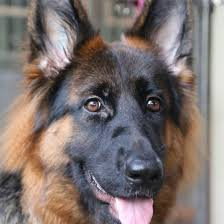

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
from google.colab import files
from PIL import Image, ImageOps

# 加载预训练模型
model = MobileNetV2(weights='imagenet')

def load_and_process_img(img_path):
    # 加载图像并转换为RGB
    img = Image.open(img_path).convert("RGB")

    # 中心裁剪成正方形，减少背景干扰
    width, height = img.size
    min_dim = min(width, height)
    left = (width - min_dim) / 2
    top = (height - min_dim) / 2
    right = (width + min_dim) / 2
    bottom = (height + min_dim) / 2
    img = img.crop((left, top, right, bottom))

    # 缩放到模型输入大小
    img = img.resize((224, 224))

    # 转换成模型需要的格式
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x, img  # 返回图像本身用于展示
@tf.function
def predict_once(x):
    return model(x)

# 然后用 predict_once 来替代 model.predict
preds = predict_once(x)

# 上传图片
uploaded = files.upload()
for fn in uploaded.keys():
    x, img = load_and_process_img(fn)
    preds = model.predict(x)
    preds_decoded = decode_predictions(preds, top=3)[0]

    # 显示预测结果
    print("Prediction Results:")
    for i, (code, label, prob) in enumerate(preds_decoded):
        print(f"Top {i+1}: {label}, confidence: {prob:.2f}")

    # 显示处理过的图片
    display(img)